In [1]:
import os
import cv2
import requests

def recognize_images_in_folder(folder_path, api_url):
    results = []

    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder_path, filename)

            # Open the image file
            with open(image_path, 'rb') as image_file:
                # Prepare the files parameter for the API request
                files = {'file': (filename, image_file, 'image/jpeg')}  # Adjust content type if needed

                try:

                    # Make the API request
                    response = requests.post(api_url, files=files)

                    # Assuming the API returns the recognition result in JSON format
                    result_json = response.json()
                    print("response json:", result_json)

                    # Extract and store only the 'id' field from the first element of the list
                    result_id = result_json.get('response', [])[0].get('id') if result_json else None

                except:
                    result_id = None

                # Append the result to the array
                results.append({'result_id': result_id})

    return results

# Example usage:
current_dir = os.getcwd()
folder_path = os.path.join(current_dir, 'datasets\\raw\\sam35')
# folder_path = 'path/to/your/image/folder'  # Replace with the actual path to your image folder
api_url = 'http://127.0.0.1:6006/recognize'  # Replace with the actual API endpoint URL
recognition_results = recognize_images_in_folder(folder_path, api_url)



response json: {'response': [{'accuracy': '[0.91859444]', 'id': '968554', 'name': 'Samir Khanal', 'time': '08:36:10'}]}
response json: {'response': []}
response json: {'response': [{'accuracy': '[0.76483799]', 'id': '968554', 'name': 'Samir Khanal', 'time': '08:36:11'}]}
response json: {'response': [{'accuracy': '[0.84625001]', 'id': '968554', 'name': 'Samir Khanal', 'time': '08:36:11'}]}
response json: {'response': [{'accuracy': '[0.95342377]', 'id': '968554', 'name': 'Samir Khanal', 'time': '08:36:11'}]}
response json: {'response': [{'accuracy': '[0.99768773]', 'id': '968554', 'name': 'Samir Khanal', 'time': '08:36:11'}]}
response json: {'response': [{'accuracy': '[0.99999158]', 'id': '968554', 'name': 'Samir Khanal', 'time': '08:36:11'}]}
response json: {'response': [{'accuracy': '[0.99999944]', 'id': '968554', 'name': 'Samir Khanal', 'time': '08:36:12'}]}
response json: {'response': [{'accuracy': '[0.98841511]', 'id': '968554', 'name': 'Samir Khanal', 'time': '08:36:12'}]}
response

In [2]:
recognition_results

[{'result_id': '968554'},
 {'result_id': None},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': None},
 {'result_id': None},
 {'result_id': '968554'},
 {'result_id': None},
 {'result_id': None},
 {'result_id': None},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': None},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id': '968554'},
 {'result_id':

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame(recognition_results)

In [5]:
df.head()

,result_id
0,968554
1,None
2,968554
3,968554
4,968554


In [6]:
len(df)

53

In [7]:
df['result_id'].unique()

array(['968554', None], dtype=object)

In [8]:
df.isnull().sum()

result_id    7
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df['result_id'].unique()

array(['968554'], dtype=object)

In [11]:
len(df)

46

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [13]:
# Hypothetical ground truth data
ground_truth = pd.Series([968554 for i in range(53)])
ground_truth

0     968554
1     968554
2     968554
3     968554
4     968554
5     968554
6     968554
7     968554
8     968554
9     968554
10    968554
11    968554
12    968554
13    968554
14    968554
15    968554
16    968554
17    968554
18    968554
19    968554
20    968554
21    968554
22    968554
23    968554
24    968554
25    968554
26    968554
27    968554
28    968554
29    968554
30    968554
31    968554
32    968554
33    968554
34    968554
35    968554
36    968554
37    968554
38    968554
39    968554
40    968554
41    968554
42    968554
43    968554
44    968554
45    968554
46    968554
47    968554
48    968554
49    968554
50    968554
51    968554
52    968554
dtype: int64

In [14]:
# Create a DataFrame
df2 = pd.DataFrame({'ground_truth': ground_truth, 'prediction': recognition_results})

In [15]:
# Drop rows with None values (NaN) in either ground truth or prediction
df2 = df2.dropna()

In [16]:
len(df2)

53

In [17]:
df2.head()

,ground_truth,prediction
0,968554,{'result_id': '968554'}
1,968554,{'result_id': None}
2,968554,{'result_id': '968554'}
3,968554,{'result_id': '968554'}
4,968554,{'result_id': '968554'}


In [18]:
# Extract 'result_id' from dictionaries in the 'prediction' column
df2['predicted_result_id'] = df2['prediction'].apply(lambda x: x.get('result_id') if x else -1)

In [19]:
df2.head()

,ground_truth,prediction,predicted_result_id
0,968554,{'result_id': '968554'},968554
1,968554,{'result_id': None},None
2,968554,{'result_id': '968554'},968554
3,968554,{'result_id': '968554'},968554
4,968554,{'result_id': '968554'},968554


In [20]:
df2['ground_truth'] = df2['ground_truth'].astype(str)
df2.describe()

,ground_truth,prediction,predicted_result_id
count,53,53,46
unique,1,2,1
top,968554,{'result_id': '968554'},968554
freq,53,46,46


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ground_truth         53 non-null     object
 1   prediction           53 non-null     object
 2   predicted_result_id  46 non-null     object
dtypes: object(3)
memory usage: 1.4+ KB


In [22]:
df2['predicted_result_id'] = df2['predicted_result_id'].fillna(1)

In [23]:
df2['predicted_result_id'] = df2['predicted_result_id'].astype(str)

In [24]:
df2.head()

,ground_truth,prediction,predicted_result_id
0,968554,{'result_id': '968554'},968554
1,968554,{'result_id': None},1
2,968554,{'result_id': '968554'},968554
3,968554,{'result_id': '968554'},968554
4,968554,{'result_id': '968554'},968554


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ground_truth         53 non-null     object
 1   prediction           53 non-null     object
 2   predicted_result_id  53 non-null     object
dtypes: object(3)
memory usage: 1.4+ KB


In [26]:
accuracy = accuracy_score(df2['ground_truth'], df2['predicted_result_id'])
accuracy

0.8679245283018868

In [27]:
precision = precision_score(df2['ground_truth'], df2['predicted_result_id'], average='weighted')
precision 

1.0

In [28]:
recall = recall_score(df2['ground_truth'], df2['predicted_result_id'], average='weighted')
recall

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8679245283018868

In [29]:
f1 = f1_score(df2['ground_truth'], df2['predicted_result_id'], average='weighted')
f1 

0.9292929292929293

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

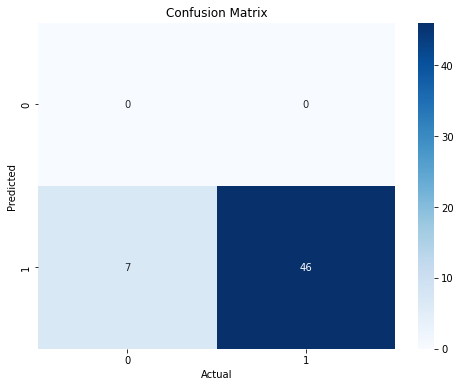

In [31]:
# Create a confusion matrix
conf_matrix = confusion_matrix(df2['ground_truth'], df2['predicted_result_id'])

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [32]:
conf_matrix

array([[ 0,  0],
       [ 7, 46]], dtype=int64)